## Feature Engineering


*   The fourth project is the development of a notebook (code + explanation) that successfully engineers 12 unique types of features, **three** for each type of feature engineering: **transforming**, **interacting**, **mapping**, and **extracting**.
* The second part of the assignment is the development of a **deep learning classification** model to predict the direction of the S&P500 for the dates **2018-01-01—2018-07-12** (test set).
* The feature engineering section is unrelated to the model section, you can develop any features, not just features that would work for deep learning models (later on you can decide which features to use in your model).
*  You also have to uncomment all the example features and make them run successfully  → **every** feature example has some error/s that you have to fix. Please also describe the error you fixed!
*   Note that we *won't* be attempting to measure the quality of every feature (i.e., how much it improves the model), that is slightly too advanced for this course.


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

Preparing the Data

In [158]:
# preparing our data
raw_prices = pd.read_csv("https://storage.googleapis.com/sovai-public/random/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df["target"] = df["SP500"].pct_change().shift(-1)
df["target"] = np.where(df["target"]>0,1,0)
df.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,target
Dates,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,1
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,1
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0


### Train Test Split

In [159]:
from sklearn.model_selection import train_test_split
y = df.pop("target")
X = df.copy()

X_train = X[X.index.astype(str)<'2018-01-01']
y_train = y[X_train.index]
X_test = X[~X.index.isin(X_train.index)]
y_test = y[X_test.index]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Transforming

1. Refresh your mind on tranformation methods by going back to the material. I am simply providing 1 example here.
1. Don't repeat my logarithmic return calculation, develop your own transformation (there are 1000s of types of transformations).
1. In the example I provide, there is also an error that you have to fix. For example, one of the errors below is that you should actually use `np.log1p()`, but there is another one, so watch out!

In [ ]:
# Example Transforming (has errors)

# Name: Logarithmic return of FTSE
# Description: Developing the logarithmic return feature for use within linear models that make normality assumptions.
# Error  -  Added np.log1p Also, both X_train and X_test are transformed. ALso made .pct_change as we want the log of returns and just the values
def log_values_return(df):
    df["FTSE_log_return"] = np.log1p(df["FTSE"].pct_change())
    return df
X_train = log_values_return(X_train)
X_test = log_values_return(X_test)


              FTSE  EuroStoxx50        SP500         Gold    French-2Y  \
count  7682.000000  7682.000000  7682.000000  7682.000000  7682.000000   
mean   4963.027135  2676.173213  1158.608469   699.251304   103.851192   
std    1542.440297  1093.593906   588.816044   456.205247     4.651301   
min    1990.200000   818.500000   287.110000   252.850000    89.925000   
25%    3727.525000  1637.457500   657.795000   350.775000   101.253750   
50%    5290.915000  2795.350000  1149.775000   400.350000   104.839000   
75%    6210.170000  3448.370250  1417.252500  1178.305000   107.470000   
max    7877.450000  5464.430000  2872.870000  1898.250000   111.218000   

         French-5Y   French-10Y   French-30Y        US-2Y        US-5Y  \
count  7682.000000  7682.000000  7682.000000  7682.000000  7682.000000   
mean    125.639842   139.493888   170.176966   114.683909   126.287628   
std      18.055983    32.718964    59.922221     8.245838    16.734645   
min      91.211000    88.147000    80

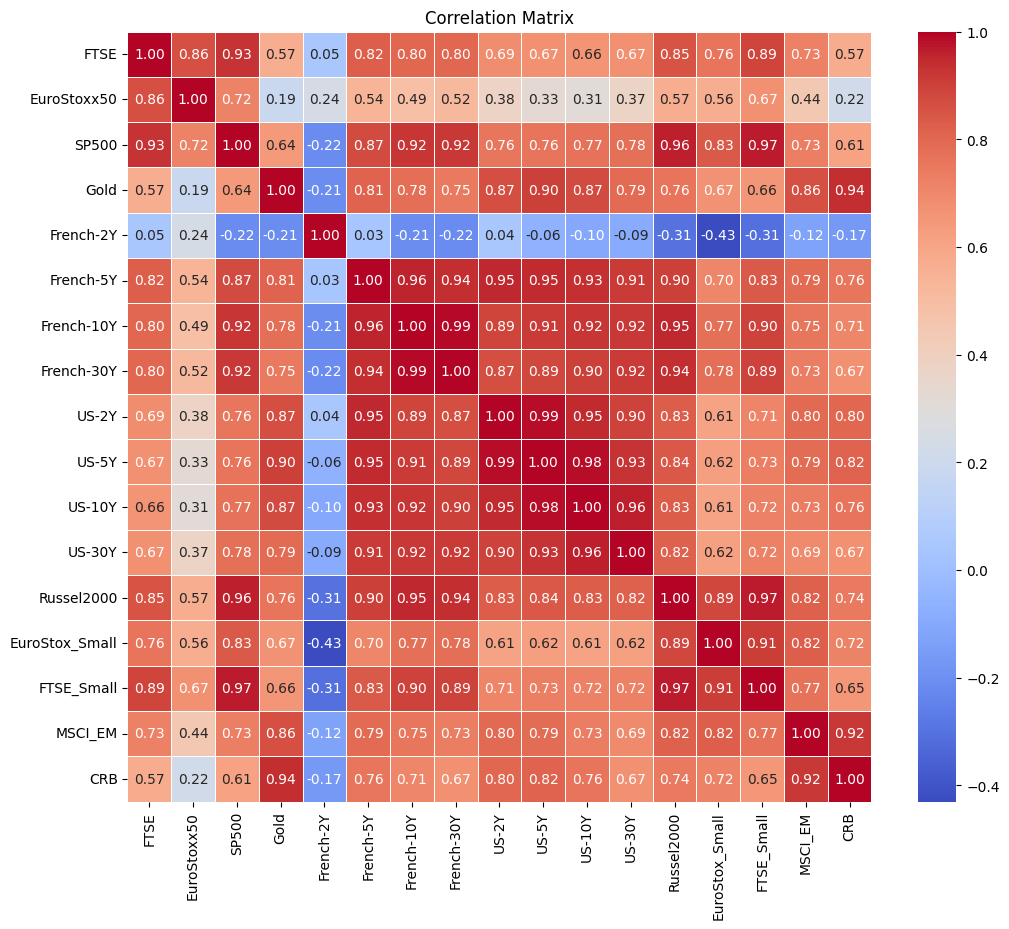

In [161]:
print(df.describe())

# Correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

You can see there is a lot of correation among the features.

In [ ]:
## Transforming 1 (Add code below)
# MinMaxScaler
# Name: Min-Max Scaling of FTSE
# Description: Scales the prices to a fixed range of 0 to 1.
from sklearn.preprocessing import MinMaxScaler

def min_max_scale_column(train_data, test_data, column_name):
    train_column = train_data[column_name].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled_train_column = scaler.fit_transform(train_column)
    scaled_test_column = scaler.transform(test_data[column_name].values.reshape(-1, 1))
    train_data[column_name + '_scaled'] = scaled_train_column.flatten()
    test_data[column_name + '_scaled'] = scaled_test_column.flatten()
    return train_data, test_data

X_train, X_test = min_max_scale_column(X_train, X_test, 'FTSE')

In [ ]:
## Transforming 2 (Add code below)
# Name: Savgol filter smooting
# Description: Smoothing the data to increase the precision of the data without distorting the signal tendency.
from scipy.signal import savgol_filter

def smoothing(df):
    df["EuroStox_Small_smooth"] = savgol_filter(df['EuroStox_Small'], 51, 3)
    df["EuroStoxx50_smooth"] = savgol_filter(df['EuroStoxx50'], 51, 3)
    return df

X_train = smoothing(X_train)
X_test = smoothing(X_test)

In [ ]:
## Transforming 3 (Add code below)

# Name: Standardization of Russel2000
# Description: Standardizes the Russel2000 index values to have a mean of zero and a standard deviation of one.
from sklearn.preprocessing import StandardScaler

def standardize_column(train_data, test_data, column_name):
    scaler = StandardScaler()
    train_data[column_name + '_standardized'] = scaler.fit_transform(train_data[[column_name]])
    test_data[column_name + '_standardized'] = scaler.transform(test_data[[column_name]])

    return train_data, test_data

X_train, X_test = standardize_column(X_train, X_test, 'Russel2000')

### Interacting

There are millions of possible interaction methods, be creative and come up with your own. For this assignment there is no 'right' feature engineering method, you simply develop one, and give it a name and a discreption.

In [ ]:
# Example Interacting (has errors)

# Name: Ratio of Gold return to 10Y treasury
# Desciption: Both gold and treasuries are safe-haven assets and descrepency in their ratio could be a sign of some marco-economic event.
# The error is that gold returns were not being calculated, you were using the price as the return
def gold_to_yield(df):
  teny_returns = df["US-10Y"].pct_change()
  gold_returns = df["Gold"].pct_change()
  df["gold_r__div__teny_r"] = gold_returns/teny_returns
  return df

X_train = gold_to_yield(X_train)
X_test = gold_to_yield(X_test)

In [166]:
X_train.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,FTSE_log_return,FTSE_scaled,EuroStox_Small_smooth,EuroStoxx50_smooth,Russel2000_standardized,gold_r__div__teny_r
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,...,117.50,1636.57,133.584,286.67,NaN,0.008688,118.614547,887.620236,-1.275841,NaN
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,117.69,1642.94,135.052,287.03,0.001812,0.009337,118.483780,885.848701,-1.274199,2.043878
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,118.62,1659.11,137.134,285.63,0.012885,0.013988,118.360086,884.161164,-1.272001,8.724098
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,118.89,1656.86,137.037,284.69,-0.012445,0.009495,118.243697,882.557581,-1.272323,1.533094
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,118.28,1662.76,136.914,284.21,0.013845,0.014497,118.134845,881.037904,-1.268630,3.525563


In [ ]:
## Interacting 1 (Add code below)
#Name: Market Sentiment Spread
#Description: This function calculates the market sentiment spread for given markets over a specified rolling window period. It quantifies the difference between positive and negative price changes.
#Market sentiment can influence investment decisions and market behavior. Understanding sentiment spread helps gauge market mood and potential trends.
def market_sentiment_spread(df, markets, window):
    sentiment_spread = df[markets].pct_change().apply(lambda x: (x > 0).sum() - (x < 0).sum(), axis=1)
    df[f'MSS_{window}'] = sentiment_spread.rolling(window).mean()
    return df

X_train = market_sentiment_spread(X_train, ['FTSE', 'SP500', 'EuroStoxx50', 'Russel2000'], window=30)
X_test = market_sentiment_spread(X_test, ['FTSE', 'SP500', 'EuroStoxx50', 'Russel2000'], window=30)

In [ ]:
## Interacting 2 (Add code below)
#Name - Yield Interactions
#This feature calculates the interaction between different segments of the yield curves of US and French bonds. It captures the relationship between short-term and long-term yields within each market.
def bond_yield_curve_interaction(df, us_bonds, french_bonds):
    us_yield_curve = df[us_bonds].mean(axis=1)
    french_yield_curve = df[french_bonds].mean(axis=1)
    yield_curve_interaction = us_yield_curve - french_yield_curve
    df['US_French_Yield_Curve_BYCI'] = yield_curve_interaction
    return df

X_train = bond_yield_curve_interaction(X_train, ['US-2Y', 'US-5Y', 'US-10Y', 'US-30Y'], ['French-2Y', 'French-5Y', 'French-10Y', 'French-30Y'])
X_test = bond_yield_curve_interaction(X_test, ['US-2Y', 'US-5Y', 'US-10Y', 'US-30Y'], ['French-2Y', 'French-5Y', 'French-10Y', 'French-30Y'])

In [ ]:
# Name: Correlation of Gold to Emerging Markets
# Desciption: Gold is a safe asset while Emerging Market stocks are most risky ones. The correlation between them can tell about the market.
def corr(df):
    df['corr_Gold_EM'] = df['Gold'].rolling(7).corr(df['MSCI_EM'])
    return df

X_train = corr(X_train)
X_test = corr(X_test)

In [170]:
X_train.tail()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,CRB,FTSE_log_return,FTSE_scaled,EuroStox_Small_smooth,EuroStoxx50_smooth,Russel2000_standardized,gold_r__div__teny_r,MSS_30,US_French_Yield_Curve_BYCI,corr_Gold_EM
Dates,,,,,,,,,,,,,,,,,,,,,
2017-12-25,7592.66,3553.389,2683.34,1274.29,91.846,149.476,209.557,293.433,124.228,147.302,...,431.77,0.000000,0.983307,266.395017,3552.155923,2.794453,NaN,-0.066667,-38.64925,0.949441
2017-12-26,7592.66,3553.389,2680.50,1282.51,91.846,149.476,209.557,293.433,124.228,147.418,...,432.65,0.000000,0.983307,266.763823,3551.787906,2.798264,3.376768,0.066667,-38.31275,0.833751
2017-12-27,7620.68,3550.174,2682.62,1286.08,91.793,149.605,209.935,294.529,124.282,147.651,...,431.77,0.003684,0.988225,267.149072,3551.567710,2.797414,0.582739,0.200000,-37.87650,0.887337
2017-12-28,7622.88,3524.309,2687.54,1294.09,91.709,149.312,209.150,291.257,124.243,147.558,...,432.22,0.000289,0.988611,267.550821,3551.500074,2.812041,-3.572512,0.133333,-36.96050,0.913545
2017-12-29,7687.77,3503.964,2673.61,1303.46,91.743,149.391,208.651,289.210,124.281,147.721,...,432.45,0.008477,1.000000,267.969129,3551.589736,2.772703,3.795609,0.133333,-36.08225,0.941425


### Mapping

This one is slightly harder, you have to identify other  dimensionality reduction methods, there are many more than just PCA. Maybe you can also look at performing the decompositions just on a single asset classes, e.g., US-2Y, US-5Y, US-10Y, US-30Y is a fixed income asset class, but there are a few others in the dataset.

In [171]:
# Example Mapping (has errors)

# Name: First prinicipal component of all of the assets returns
# Description:For stocks the first component resmbles the return of the market, for multiple asset classes it could resemble a 'universal' asset class
# # Data was not clean. Had inf values.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

def pca_first(X_train, X_test):
    X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
    X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0)

    imputer = SimpleImputer(strategy='mean')
    X_train_filled = imputer.fit_transform(X_train)
    X_test_filled = imputer.transform(X_test)

    sc = StandardScaler()
    X_train_s = sc.fit_transform(X_train_filled)
    X_test_s = sc.transform(X_test_filled)

    pca = PCA(1)
    X_train["first_prinicipal"] = pca.fit_transform(X_train_s)
    X_test["first_prinicipal"] = pca.transform(X_test_s)
    return X_train, X_test

X_train, X_test = pca_first(X_train, X_test)

# # ValueError: Input contains infinity or a value too large for dtype('float64').

In [172]:
#Name: LDA Feature Reduction
#Description: This code utilizes Linear Discriminant Analysis (LDA) to reduce feature dimensionality while preserving class discrimination, aiding classification tasks.
#LDA maximizes class separability, enhancing model performance by focusing on the most discriminative features for classification.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def lda_reduction(X_train, X_test, y_train):
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_train["lda_component"] = lda.fit_transform(X_train, y_train)
    X_test["lda_component"] = lda.transform(X_test)
    return X_train, X_test

X_train, X_test = lda_reduction(X_train, X_test, y_train)

In [173]:
# Name: Kernel PCA
# Description: Kernel PCA extends PCA to higher-dimensional, non-linear transformations.
from sklearn.decomposition import KernelPCA

def kernel_pca(X_train, X_test):
    kpca = KernelPCA(n_components=2, kernel='rbf')
    kpca.fit(X_train)
    X_train_kpca = kpca.transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    return X_train_kpca, X_test_kpca

X_train_kpca, X_test_kpca = kernel_pca(X_train, X_test)

In [174]:
#Title: Non-Negative Matrix Factorization for US Treasury Yields
#Description: Non-Negative Matrix Factorization (NMF) is employed to process non-negative inputs, making it suitable for tasks such as dimensionality reduction,
# source separation, or topic extraction. Given that treasury yields are inherently positive values, NMF is an appropriate technique for analyzing such data.
from sklearn.decomposition import NMF

def nmf_first(X_train, X_test):
    nmf = NMF(1)
    X_train["US_Treasury_nmf"] = nmf.fit_transform(X_train[["US-2Y","US-5Y","US-10Y","US-30Y"]].fillna(0))
    X_test["US_Treasury_nmf"] = nmf.transform(X_test[["US-2Y","US-5Y","US-10Y","US-30Y"]].fillna(0))
    return X_train, X_test

X_train, X_test = nmf_first(X_train, X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Extracting

In [175]:
# Example Extracting (has errors)
# Name: Annualized volatility in returns
# Description: We are developing an annualized volatility measure for all asset returns, which is a good measure of market turbulence
# There are 252 trading days not 365
def vola(df):
   volatility = df.pct_change().rolling(window=252).std()*(252**0.5)
   new_names = [(i,i+'_vol') for i in df.columns.values]
   volatility.rename(columns = dict(new_names), inplace=True)
   df = pd.concat((df, volatility), axis=1)
   return df

X_train = vola(X_train); X_test = vola(X_test)

In [176]:
## Extracting 1 (Add code below)
# Name: Exponential Weighted Moving Average for FTSE
# Description: Compute the exponential moving average (EMA) of the FTSE Index over a period of 15 days. you can change the period
def ewma(df, span=20):
    df['FTSE_EWMA'] = df['FTSE'].ewm(span=span, adjust=False).mean()
    return df

X_train = ewma(X_train, span=15)
X_test = ewma(X_test, span=15)

In [177]:
## Extracting 2 (Add code below)
# Name: Rolling Mean for Gold
# Description: Computes the moving average of the Gold over a specified window.
def rolling_mean(df, window=30):
    df['gold_rolling_mean'] = df['Gold'].rolling(window=30).mean()
    return df

X_train = rolling_mean(X_train, window=30)
X_test = rolling_mean(X_test, window=30)

In [178]:
!pip install ta
import ta
from ta.momentum import RSIIndicator

In [179]:
## Extracting 3 (Add code below)
# Name: Relative Strength Index (RSI)
# Description: RSI is a momentum indicator utilized in technical analysis to assess the extent of recent price fluctuations.
#It helps identify potential overbought or oversold conditions in the price of a stock or other asset.

def rsi(df, columns):
    for col in columns:
        indicator_rsi = RSIIndicator(df[col], 20)
        ma = indicator_rsi.rsi().to_frame(name = col+'_rsi')
        df = pd.concat((df, ma), axis=1)
    return df

X_train = rsi(X_train, ['SP500', 'Russel2000'])
X_test = rsi(X_test, ['SP500', 'Russel2000'])

In [180]:
X_train.tail()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,MSS_30_vol,US_French_Yield_Curve_BYCI_vol,corr_Gold_EM_vol,first_prinicipal_vol,lda_component_vol,US_Treasury_nmf_vol,FTSE_EWMA,gold_rolling_mean,SP500_rsi,Russel2000_rsi
Dates,,,,,,,,,,,,,,,,,,,,,
2017-12-25,7592.66,3553.389,2683.34,1274.29,91.846,149.476,209.557,293.433,124.228,147.302,...,NaN,0.281928,216.555506,0.101886,848.303128,0.049664,7505.676137,1271.579667,69.772136,58.681524
2017-12-26,7592.66,3553.389,2680.50,1282.51,91.846,149.476,209.557,293.433,124.228,147.418,...,NaN,0.282054,216.555147,0.101789,848.292778,0.049529,7516.549120,1271.687667,68.355838,59.034553
2017-12-27,7620.68,3550.174,2682.62,1286.08,91.793,149.605,209.935,294.529,124.282,147.651,...,NaN,0.282170,216.555492,0.101983,848.265000,0.049738,7529.565480,1271.936000,68.852645,58.916349
2017-12-28,7622.88,3524.309,2687.54,1294.09,91.709,149.312,209.150,291.257,124.243,147.558,...,NaN,0.283117,216.555537,0.101896,848.267708,0.049753,7541.229795,1272.395667,70.003117,60.354167
2017-12-29,7687.77,3503.964,2673.61,1303.46,91.743,149.391,208.651,289.210,124.281,147.721,...,NaN,0.283989,216.555788,0.101845,848.278325,0.049777,7559.547321,1272.921000,63.061198,54.913612


## Deep Learning Binary Classification

* For the deep learning model you can perform new data preprocessing methods and new feature engineering that are better suited to neural networks. You can also use all or some of the features you developed above (most features work in deep learning models as long as they are normalized).
* It is very hard to predict the stock price, so in my grading I will look more at the quality of the model you process (e.g., that there is no data leakage, that you performed some hyperparameter tuning).
* Make sure that you switch your GPU on, you have access to it on Colab. The training stage also takes long, you might want to use a smaller amount of data, or fewer epochs at first to speed up your development process.
* After your training is done, you don't have to save your model, but you do have to print the performance of your model. You can report two metrics the ROC(AUC) and the Accuracy against the test set.
* Also remember to set the random seed (random state) so that when I run your software, I get similar results (the results doesn't have to be exactely the same).
* You can choose any type of deep learning archetecture, e.g., LSTM, GRU, CNN, it is up to you.
* Remember that this section is less that 25% of the grade, so don't waste your time here.
* And lastly, remember this is the stock market, so it is **difficult** to have an accuracy above 50%, good luck!

In [181]:
## Implement Here

raw_prices = pd.read_csv("https://storage.googleapis.com/sovai-public/random/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df = df.replace([np.inf, -np.inf], np.nan).dropna()
target = 'SP500'
X = df.drop(target, axis=1)
y = df[target]

In [182]:
sc = StandardScaler()
X_PCA = sc.fit_transform(X)
pca = PCA(1)
X["first_prinicipal"] = pca.fit_transform(X_PCA)

In [183]:
# A few indicators
X['RSI'] = ta.momentum.RSIIndicator(close=y).rsi()
X['MACD'] = ta.trend.MACD(close=y).macd()
bb = ta.volatility.BollingerBands(close=y)
X['BB_High'] = bb.bollinger_hband()
X['BB_Low'] = bb.bollinger_lband()
X['20_SMA'] = y.rolling(window=20).mean()
X['200_SMA'] = y.rolling(window=200).mean()
X['20_EMA'] = y.ewm(span=20).mean()
X['200_EMA'] = y.ewm(span=200).mean()
X['SMA_Cross'] = X['20_SMA'] > X['200_SMA']
X['EMA_Cross'] = X['20_EMA'] > X['200_EMA']

In [184]:
X['EMA_Cross'] = X['EMA_Cross'].astype(int)
X['SMA_Cross'] = X['SMA_Cross'].astype(int)
features = ['EuroStoxx50', 'Gold', 'Russel2000', \
          'EuroStox_Small', 'FTSE_Small', 'MSCI_EM', 'CRB', 'first_prinicipal', \
          'RSI', 'MACD', 'BB_High', \
          'BB_Low', 'SMA_Cross', \
          'EMA_Cross']
X = X[features].dropna()


In [185]:
# Derive more indicators from previous
# Test Train Split
# Scale data
X_train = X[X.index.astype(str)<'2017-01-01']
y_train = y[X_train.index]
X_test = X[~X.index.isin(X_train.index)]
y_test = y[X_test.index]

scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.array(y_train).reshape((-1,1))
y_test = np.array(y_test).reshape((-1,1))
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [186]:
# Create windows for predictions
def prepare_data(X, y, n_steps):
    xa, ya = [], []
    for i in range(len(X) - n_steps):
        xa.append(X[i:(i + n_steps)])
        ya.append(y[i + n_steps])
    return np.array(xa), np.array(ya)

n_steps = 60
X_train, y_train = prepare_data(X_train, y_train,n_steps)
X_test, y_test = prepare_data(X_test, y_test, n_steps)

In [187]:
# You might have to use this
#!pip install scikeras

In [188]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scikeras.wrappers import KerasRegressor
# Define the function to create the model
def create_model(optimizer='Adam', units=50):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
    model.add(Dense(6))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

from sklearn.model_selection import GridSearchCV


# Create an instance of the KerasRegressor wrapper
keras_wrapper = KerasRegressor(build_fn=create_model, verbose=1)

# Define the parameters grid. Here I commented epochs as it takes more than 25 minutes to run with it and the more the epochs the better
param_grid = {
    'optimizer': ['SGD', 'Adam'],
    'batch_size': [32, 64, 128],
    #'epochs': [10, 20],
}

# Create GridSearchCV instance
grid = GridSearchCV(estimator=keras_wrapper, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the grid search
grid_result = grid.fit(X_train, y_train)

# Print the best score and best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instea

113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0069
Best: 0.438079 using {'batch_size': 64, 'optimizer': 'SGD'}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
113/113 - 8s - 69ms/step - loss: 0.0210
Epoch 2/50
113/113 - 1s - 10ms/step - loss: 0.0047
Epoch 3/50
113/113 - 1s - 9ms/step - loss: 0.0028
Epoch 4/50
113/113 - 1s - 12ms/step - loss: 0.0019
Epoch 5/50
113/113 - 3s - 29ms/step - loss: 0.0015
Epoch 6/50
113/113 - 1s - 10ms/step - loss: 0.0012
Epoch 7/50
113/113 - 1s - 11ms/step - loss: 0.0010
Epoch 8/50
113/113 - 1s - 6ms/step - loss: 9.0372e-04
Epoch 9/50
113/113 - 1s - 11ms/step - loss: 8.0381e-04
Epoch 10/50
113/113 - 1s - 6ms/step - loss: 7.2448e-04
Epoch 11/50
113/113 - 1s - 6ms/step - loss: 6.5955e-04
Epoch 12/50
113/113 - 1s - 11ms/step - loss: 6.0876e-04
Epoch 13/50
113/113 - 1s - 6ms/step - loss: 5.6709e-04
Epoch 14/50
113/113 - 1s - 6ms/step - loss: 5.3000e-04
Epoch 15/50
113/113 - 1s - 6ms/step - loss: 5.0078e-04
Epoch 16/50
113/113 - 1s - 6ms/step - loss: 4.7643e-04
Epoch 17/50
113/113 - 1s - 12ms/step - loss: 4.5409e-04
Epoch 18/50
113/113 - 1s - 11ms/step - loss: 4.3556e-04
Epoch 19/50
113/113 - 1s - 11ms/step 

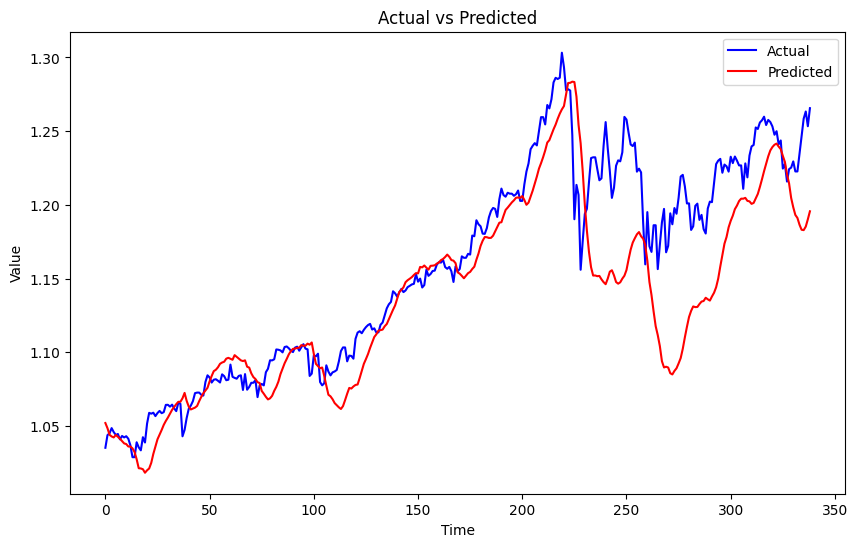

In [191]:
#using the best features for the model
best_params = grid_result.best_params_
model = create_model(optimizer=best_params['optimizer'], units = 50)
model.fit(X_train, y_train, epochs=50, batch_size=best_params['batch_size'], verbose=2)
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
y_pred_test = model.predict(X_test)


plt.figure(figsize=(10,6))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred_test, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [190]:
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

# Convert y_test and predicted values to Series
y_test_series = pd.Series(y_test.flatten())
predicted_series = pd.Series(model.predict(X_test).flatten())

# Calculate returns and sign of returns
actual_returns = y_test_series.pct_change()
predicted_returns = predicted_series.pct_change()

actual_sign = np.sign(actual_returns)
predicted_sign = np.sign(predicted_returns)

# Remove NaN values
actual_sign = actual_sign[~np.isnan(actual_sign)]
predicted_sign = predicted_sign[~np.isnan(predicted_sign)]

# Calculate accuracy
accuracy = accuracy_score(actual_sign, predicted_sign)
print(f'Accuracy: {accuracy}')

# Calculate ROC AUC
roc_auc = roc_auc_score((actual_sign == 1).astype(int), (predicted_sign == 1).astype(int))
print(f'ROC AUC: {roc_auc}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.45857988165680474
ROC AUC: 0.4488476971698448
